In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import differential_evolution

In [95]:
def prob(a, b, Ew1, Ew2, Ew3, Ew4, Ebp):
    shift1 = 14
    shift2 = 20
    shift3 = 26
    shift4 = 32
    end = 33
    prbs = []
    for i in range(end):
        if i in range(0, shift1):
            Et = i*Ebp
        if i in range(shift1, shift2):
            Et = Ew1 + i*Ebp
        if i in range(shift2, shift3):
            Et = Ew1 + Ew2 + i*Ebp
        if i in range(shift3, shift4):
            Et = Ew1 + Ew2 + Ew3 + i*Ebp
        if i in range(shift4, end):
            Et = Ew1 + Ew2 + Ew3 + Ew4 + i*Ebp
        p = b/(1+a*np.exp(Et))
        prbs.append(p)
    return prbs

In [99]:
def minimizee(x):
    data_dCas9_TXTL = [0, 0.143, 0.288, 0.531, 0.987, 0.983, 0.986, 0.929, 0.964, 0.944, 0.958,
                      0.920, 0.958, 0.98, 0.979, 0.988, 0.985, 0.972, 0.978, 0.988, 0.984, 0.965]
    pick = [0, 5, 7, 8, 10, 11, 12, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 32]
    fit_probs = np.take(prob(x[0], x[1], x[2], x[3], x[4], x[5], x[6]),
                        pick)
    return np.sum(np.square(np.subtract(data_dCas9_TXTL, fit_probs)))

In [100]:
bounds = [(1000, 1000000), (0.95, 0.99), (2, 20), (2, 20), (2, 20), (2, 20), (-0.5, -5)]

In [101]:
#Fitting
result = differential_evolution(func = minimizee, bounds = bounds, maxiter = 200, popsize = 100)

In [102]:
new_x = result.x

In [103]:
new_x

array([ 6.33425980e+03,  9.86367845e-01,  4.38181815e+00,  6.87189048e+00,
        5.04366400e+00,  7.25645666e+00, -1.13074242e+00])

In [104]:
full_length = prob(new_x[0], new_x[1], new_x[2], new_x[3], new_x[4], new_x[5], new_x[6])
x = np.arange(0, 35, 1)

In [105]:
data_dCas9_TXTL = [[0, 5, 7, 8, 10, 11, 12, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 32],
        [0, 0.143, 0.288, 0.531, 0.987, 0.983, 0.986, 0.929, 0.964, 0.944, 0.958,
                      0.920, 0.958, 0.98, 0.979, 0.988, 0.985, 0.972, 0.978, 0.988, 0.984, 0.965],
        [0.21, 0.128, 0.13, 0.071, 0.002, 0.003, 0.002, 0.012, 0.006, 0.014, 0.008, 0.012, 0.009, 
        0.003, 0.005, 0.002, 0.003, 0.005, 0.004, 0.002, 0.003, 0.006]]

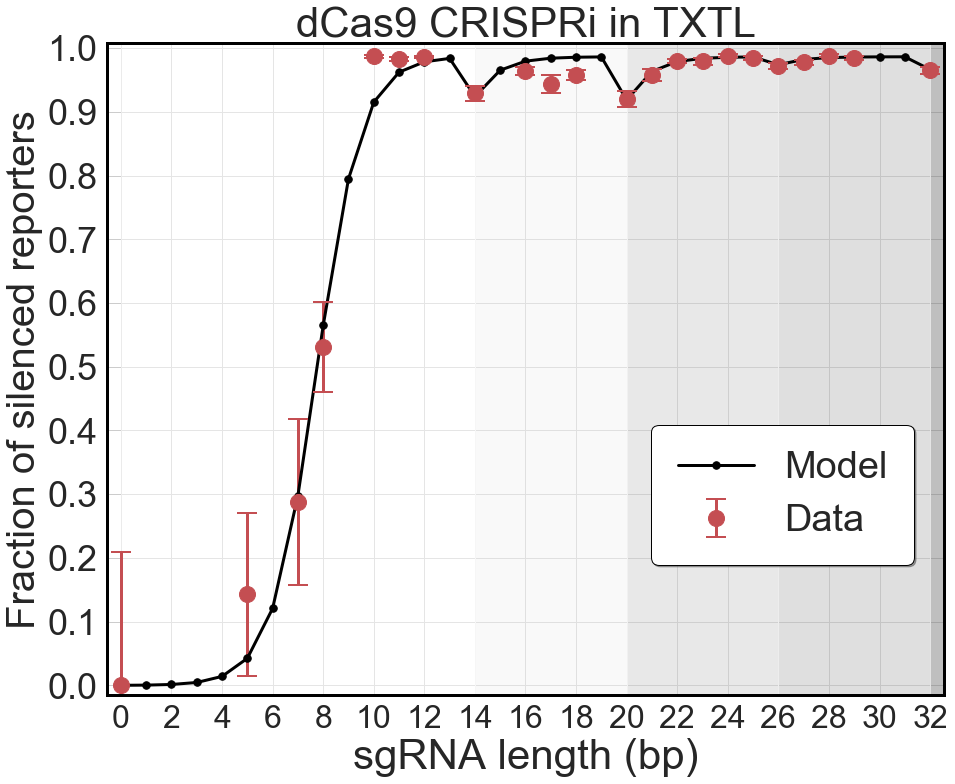

In [153]:
ax = plt.axes()
plt.plot(x[:33], full_length[:33], lw = 3, c = 'black', label = 'Model', marker = '.', ms = '15')
plt.errorbar(data_dCas9_TXTL[0], data_dCas9_TXTL[1], data_dCas9_TXTL[2], fmt = '.', 
             ecolor = 'r', capsize = 10, elinewidth = 3,
             capthick = 2, color = 'r', ms = '32', label = 'Data')
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax.set_title('dCas9 CRISPRi in TXTL', fontsize = 42)
plt.ylabel('Fraction of silenced reporters', fontsize = 40)
plt.xlabel('sgRNA length (bp)', fontsize = 42)
plt.xticks(np.arange(0, 33, 2), fontsize = 32)
plt.yticks(np.arange(0, 1.03, 0.1), fontsize = 36)
plt.ylim(-0.0155, 1.008)
plt.xlim(-0.55, 32.55)
plt.axvspan(0, 14, facecolor='w', alpha=0.5)
plt.axvspan(14, 20, facecolor='whitesmoke', alpha=0.5)
plt.axvspan(20, 26, facecolor='lightgrey', alpha=0.5)
plt.axvspan(26, 32, facecolor='silver', alpha=0.5)
plt.axvspan(32, 33, facecolor='grey', alpha=0.5)
plt.rcParams["figure.figsize"] = (15, 12)
plt.legend(loc=[0.65, 0.2], fancybox =True, borderpad = 0.7, framealpha =1, fontsize = 38,
           edgecolor = 'black', shadow = 'True')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.show()